# Models descriptions

Tools for describing different models.

In [135]:
import numpy as np
import pandas as pd

import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

from statsmodels.distributions.empirical_distribution import ECDF

In [136]:
from model_description import roc_by_preds

# Generating example data

In [137]:
sample_size = 1000
np.random.seed(0)

# binary frame
binary_frame = pd.DataFrame({"p_hat0" : np.random.uniform(0,1, sample_size)})
binary_frame["p_hat1"] = 1 - binary_frame["p_hat0"]
binary_frame['y'] = binary_frame.apply(
    lambda obs: np.random.choice([0, 1], p = [obs['p_hat0'], obs['p_hat1']]),
    axis = 1
)

# multiple frame
multiple_frame = pd.DataFrame({"p_hat0" : np.random.uniform(0,0.66666, sample_size)})
def generate_classes(p_hat0):
    alternative_classes_diff = np.random.uniform(0,1, 1)[0]
    p_hat1 = alternative_classes_diff * (1-p_hat0[0])
    return pd.Series(
        [p_hat1, 1 - p_hat0[0] - p_hat1],
        index = ["p_hat1", "p_hat2"]
    )
multiple_frame[["p_hat1", "p_hat2"]] = multiple_frame.apply(generate_classes, axis = 1)
multiple_frame['y'] = multiple_frame.apply(
    lambda obs: np.random.choice(
        [0, 1, 2], p = [obs['p_hat0'], obs['p_hat1'], obs['p_hat2']]
    ),
    axis = 1
)

# roc_by_preds

`plotly.graph_objs._scatter.Scatter` for ROC curve 

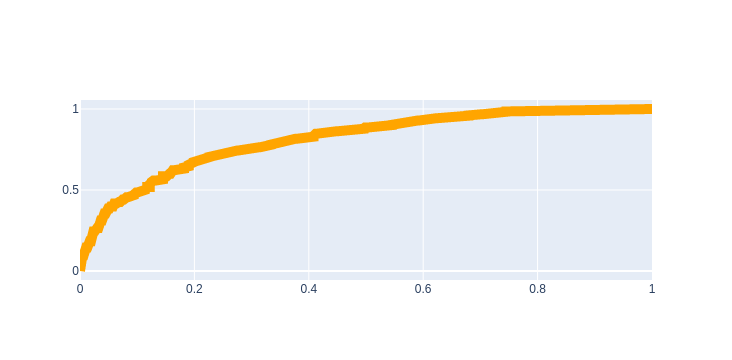

In [138]:
fig = go.Figure()

fig.add_trace(roc_by_preds(
    binary_frame["y"].to_numpy(), 
    binary_frame["p_hat1"].to_numpy(),
    pltl_scatter_kwargs = dict(
        line_color = "orange", 
        line_width = 10
    ),
    skl_roc_kwargs = dict(
        drop_intermediate = False
    )
))

### classes ECDFs by $\hat{p}$ and KS stat

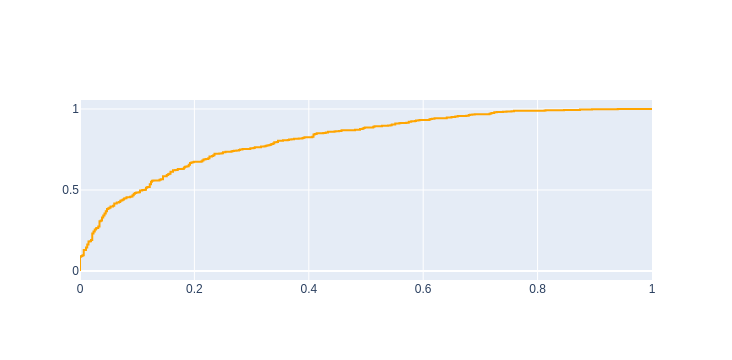

In [129]:
y_start




def class_valid_figure(y, p_hat):
    '''
    '''
    
    fig = make_subplots(
        rows=2, cols=2,
        specs=[
            [{}, {}],
            [{"colspan": 2}, None]
        ],
        subplot_titles=("ROC curve","ECDF", "histogramm")
    )
    
    # fpr, tpr, tresholds = roc_curve(fit_y, p_hat)
    # fig.add_trace(
    #     go.Scatter(x = fpr, y = tpr),
    #     rows = 1, cols = 1
    # )
    
    
    
    return fig

In [94]:
binary_frame.sort_values("p_hat1")

,p_hat0,p_hat1,y
8,0.963663,0.036337,0
7,0.891773,0.108227,0
1,0.715189,0.284811,0
5,0.645894,0.354106,0
2,0.602763,0.397237,0
0,0.548814,0.451186,1
3,0.544883,0.455117,1
6,0.437587,0.562413,0
4,0.423655,0.576345,0
9,0.383442,0.616558,1


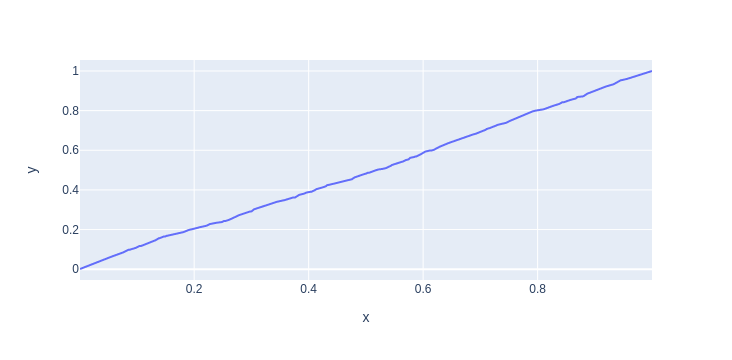

In [79]:
px.line(x = treshholds[1:], y = ECDF(binary_frame['p_hat1'])(treshholds[1:]))

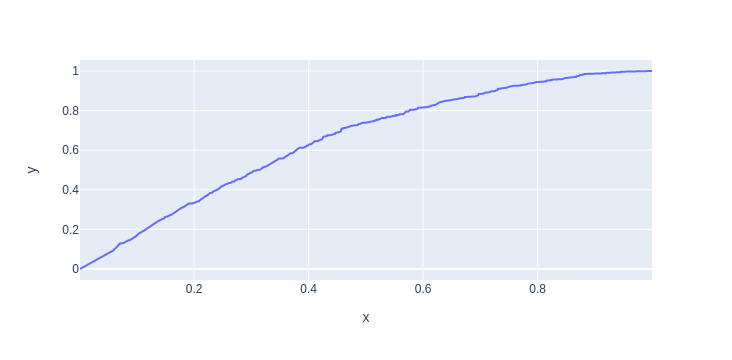

In [82]:
px.line(x = treshholds[1:],  y = 1 - fpr[1:])